In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("C:\\Users\\hp\\Documents\\exams.csv")
df = df.drop("race/ethnicity", axis=1)
num_elements_to_remove = int(0.2 * len(df['test preparation course']))
df = df.drop(["parental level of education", "lunch"], axis=1) 
gender_mapping = {"female": 0, "male": 1}
df['gender'] = df['gender'].map(gender_mapping)
test_preparation_mapping = {"none": 0, "completed": 1}
df['test preparation course'] = df['test preparation course'].map(test_preparation_mapping)



In [4]:
df.head()


,gender,test preparation course,math score,reading score,writing score
0,0,0,44,62,64
1,0,0,50,54,55
2,1,0,90,95,89
3,1,0,47,51,42
4,1,1,80,78,73


In [5]:
print (df.shape)


(1000, 5)


In [6]:
df.describe()

,gender,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.504000,0.344000,66.816000,69.599000,68.280000
std,0.500234,0.475279,15.594465,15.075924,15.648018
min,0.000000,0.000000,16.000000,23.000000,18.000000
25%,0.000000,0.000000,57.000000,59.000000,58.000000
50%,1.000000,0.000000,67.500000,70.000000,69.000000
75%,1.000000,1.000000,78.000000,80.250000,80.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000


In [7]:
df.isnull().sum()

gender                     0
test preparation course    0
math score                 0
reading score              0
writing score              0
dtype: int64

In [8]:
unique_values = df['test preparation course'].unique()
print("Différentes valeurs de la colonne 'test preparation course':")
print(unique_values)

Différentes valeurs de la colonne 'test preparation course':
[0 1]


In [9]:
#"gender",
X = df[[ "math score", "reading score", "writing score"]]
y = df["test preparation course"]


In [38]:
train_x, x_,train_y, y_ = train_test_split(X, y, test_size=0.40, random_state=1)
train_y = train_y.values.reshape(-1, 1)
print(train_x.shape)
print(train_y.shape)

scaler = StandardScaler()


X_normalized = scaler.fit_transform(train_x)
X_normalized_test = scaler.fit_transform(x_)

# Assurez-vous que les étiquettes sont sous forme de tableau 2D
y_test = y_.values.reshape(-1, 1)


print(X_normalized)


(600, 3)
(600, 1)
[[-1.59642838 -2.29442666 -2.19556534]
 [-1.27311203 -0.82127953 -0.57402521]
 [ 0.79611263 -0.55343459 -0.31457879]
 ...
 [ 0.8607759   1.05363501  0.85293011]
 [-0.82046913 -0.62039583 -0.76861002]
 [ 0.66678609 -0.28558966  0.33403727]]


In [11]:
print(f"the shape of the training set (input) is: {train_x.shape}")
print(f"the shape of the training set (target) is: {train_y.shape}\n")

the shape of the training set (input) is: (600, 3)
the shape of the training set (target) is: (600, 1)



In [12]:
n_x = 3
n_h = 1000
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.001

In [13]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [14]:
def relu(Z):
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [15]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) 
    
     
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [16]:
def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [17]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert W1.shape == (n_h, n_x)
    assert b1.shape == (n_h, 1)
    assert W2.shape == (n_y, n_h)
    assert b2.shape == (n_y, 1)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [18]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) *0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters


In [19]:
def linear_forward(A, W, b):
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [20]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    else:
        print("! Please make sure you have passed the value correctly in the \"activation\" parameter")
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache


In [21]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                 
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [22]:
def compute_cost(AL, Y):
    
    m = Y.shape[0]
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      
    assert(cost.shape == ())
    
    return cost



In [23]:
print(train_y.shape[0])

600


In [24]:
def linear_backward(dZ, cache):
   
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db


In [25]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    else:
        print("Please make sure you have passed the value correctly in the \"activation\" parameter")
    
    return dA_prev, dW, db


In [26]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
       
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [27]:
def update_parameters(parameters, grads, learning_rate):
   
    
    L = len(parameters) // 2 

    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters


In [28]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2  

    p = np.zeros((1, m))

    # Propagation avant
    probas, caches = L_model_forward(X, parameters)

   
    for i in range(probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0

    # Calculer la précision
    accuracy = np.mean((p[0, :] == y[0, :]))

    print("Précision: " + str(accuracy))

    return p


In [29]:

def two_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              
    m = X.shape[1]                           
    (n_x, n_h, n_y) = layers_dims
    
    parameters = {
        "W1": np.random.randn(n_h, n_x) * 0.01,
        "b1": np.zeros((n_h, 1)),
        "W2": np.random.randn(n_y, n_h) * 0.01,
        "b2": np.zeros((n_y, 1))
    }
    
    
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    

    for i in range(0, num_iterations):

        
        
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        
        
        
        cost = compute_cost(A2, Y)
        
        
        
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        
       
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
       
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        
        
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.01):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

Cost after iteration 0: 415.92481391235685
Cost after iteration 100: 400.7086151696455
Cost after iteration 200: 391.2703778628498
Cost after iteration 300: 385.0998781010894
Cost after iteration 400: 380.8205296387345
Cost after iteration 500: 377.67403878239804
Cost after iteration 600: 375.22055821451
Cost after iteration 700: 373.2081199415626
Cost after iteration 800: 371.48338565913036
Cost after iteration 900: 369.9566511550532
Cost after iteration 1000: 368.5760493490711
Cost after iteration 1100: 367.31304893246306
Cost after iteration 1200: 366.1528208500893
Cost after iteration 1300: 365.08871401679255
Cost after iteration 1400: 364.11854577688405
Cost after iteration 1500: 363.2385607777388
Cost after iteration 1600: 362.4427507202917
Cost after iteration 1700: 361.7251183227666
Cost after iteration 1800: 361.0796799374424
Cost after iteration 1900: 360.4938132794331
Cost after iteration 2000: 359.95697099661635
Cost after iteration 2100: 359.45827639898357
Cost after itera

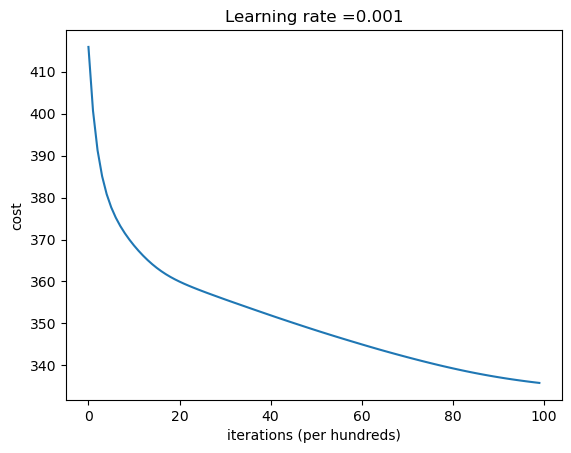

In [30]:

parameters, costs= two_layer_model(X_normalized.transpose(),train_y.transpose(), layers_dims = (n_x, n_h, n_y), num_iterations = 10000, print_cost=True)
plot_costs(costs, learning_rate)

In [33]:
predictions_train = predict(X_normalized.transpose(),train_y.transpose(), parameters)

Précision: 0.7133333333333334


Précision: 0.7133333333333334


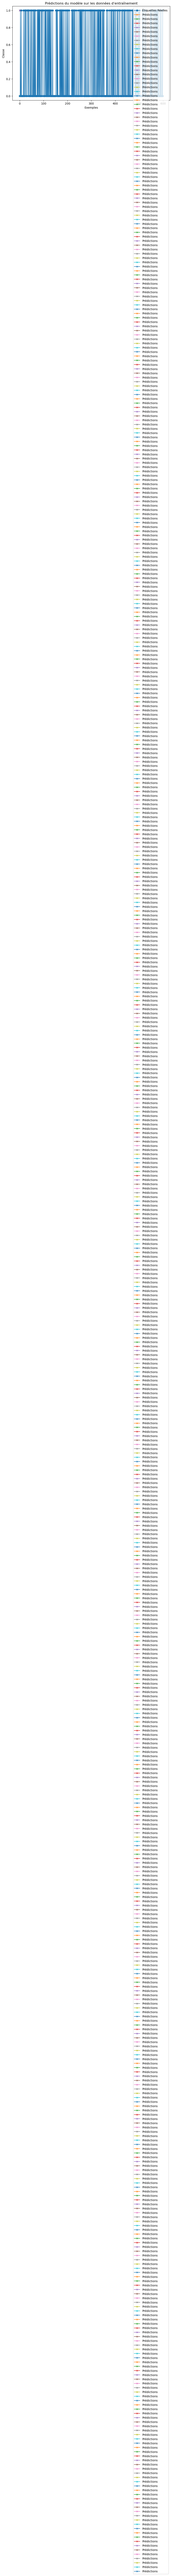

In [35]:
import matplotlib.pyplot as plt

# Supposons que predict renvoie les prédictions du modèle pour les données d'entraînement
predictions_train = predict(X_normalized.transpose(), train_y.transpose(), parameters)

# Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.plot(train_y, label='Étiquettes Réelles', marker='o')
plt.plot(predictions_train, label='Prédictions', marker='x')
plt.title('Prédictions du modèle sur les données d\'entraînement')
plt.xlabel('Exemples')
plt.ylabel('Classe')
plt.legend()
plt.show()


In [55]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import f1_score

predictions_test = predict(X_normalized_test.transpose(), y_test.transpose(), parameters)



# Supposons que y_test est la vérité terrain et predictions_test sont les prédictions de votre modèle
f1_test = f1_score(y_test.transpose(), predictions_test, average='micro')


# Affichage du F1-score sur l'ensemble de test
print("Test F1-score = %0.4f" % f1_test)



precision_test = precision_score(y_test.transpose(), predictions_test, average='micro')



#print("Test Accuracy = %0.4f" % accuracy_test)
print("Test Precision = %0.4f" % precision_test)


Précision: 0.64
Test F1-score = 0.0000
Test Precision = 0.0000


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


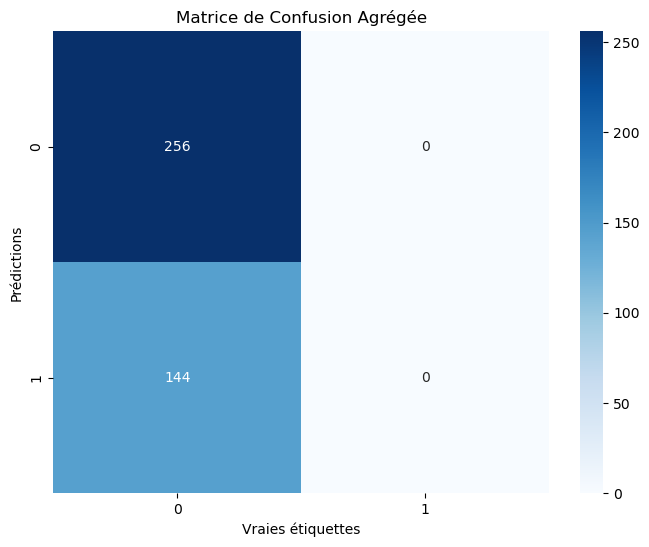

In [56]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supposez que y_test et predictions_test soient vos vraies étiquettes et prédictions, respectivement
y_true = y_test.transpose()
y_pred = predictions_test

# Calculer la matrice de confusion multilabel
conf_matrix_multilabel = multilabel_confusion_matrix(y_true, y_pred)

# Agréger les matrices de confusion des différentes classes
agg_conf_matrix = np.sum(conf_matrix_multilabel, axis=0)

# Afficher la matrice de confusion agrégée avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(agg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matrice de Confusion Agrégée')
plt.xlabel('Vraies étiquettes')
plt.ylabel('Prédictions')
plt.show()


In [47]:


layers_dims = [3, 10, 10, 3, 1]

def L_layer_model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 3000, print_cost=False):
    

    np.random.seed(1)
    costs = []                       
    
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):

        
        AL, caches = L_model_forward(X, parameters)
        
        
        
        cost = compute_cost(AL, Y)
        
        
       
        grads = L_model_backward(AL, Y, caches)
        
        
        
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [48]:
parameters, costs = L_layer_model(X_normalized.transpose(),train_y.transpose(), layers_dims, num_iterations = 10, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))



Cost after iteration 9: 415.7386204698986
Cost after first iteration: 415.8883081332124


In [49]:
parameters, costs = L_layer_model(X_normalized.transpose(),train_y.transpose(), layers_dims, num_iterations = 500, print_cost = True)

Cost after iteration 0: 415.8883081332124
Cost after iteration 100: 414.2623572213563
Cost after iteration 200: 412.71571144498387
Cost after iteration 300: 411.24448858939587
Cost after iteration 400: 409.8449885785966
Cost after iteration 499: 408.5266731907193


In [50]:
pred_train = predict(X_normalized.transpose(),train_y.transpose(), parameters)

Précision: 0.6666666666666666


In [51]:
from sklearn.metrics import f1_score

f1_test = f1_score(y_test.transpose(), predictions_test, average='micro')

print("Test F1-score = %0.4f" % f1_test)

Test F1-score = 0.4837


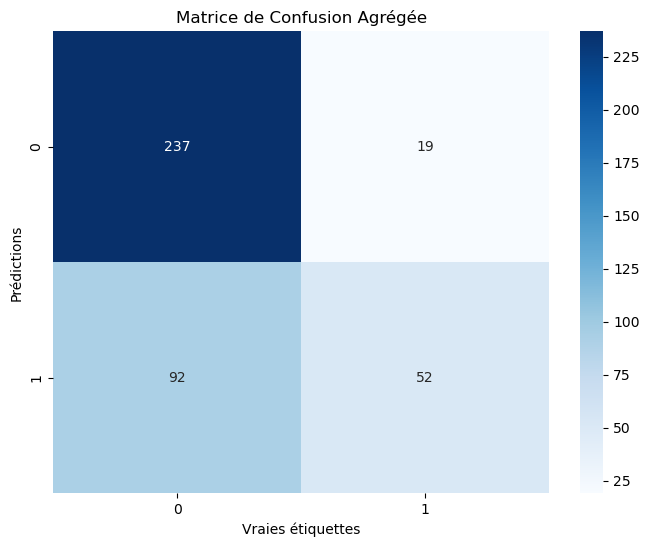

In [54]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supposez que y_test et predictions_test soient vos vraies étiquettes et prédictions, respectivement
y_true = y_test.transpose()
y_pred = predictions_test

# Calculer la matrice de confusion multilabel
conf_matrix_multilabel = multilabel_confusion_matrix(y_true, y_pred)

# Agréger les matrices de confusion des différentes classes
agg_conf_matrix = np.sum(conf_matrix_multilabel, axis=0)

# Afficher la matrice de confusion agrégée avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(agg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matrice de Confusion Agrégée')
plt.xlabel('Vraies étiquettes')
plt.ylabel('Prédictions')
plt.show()
